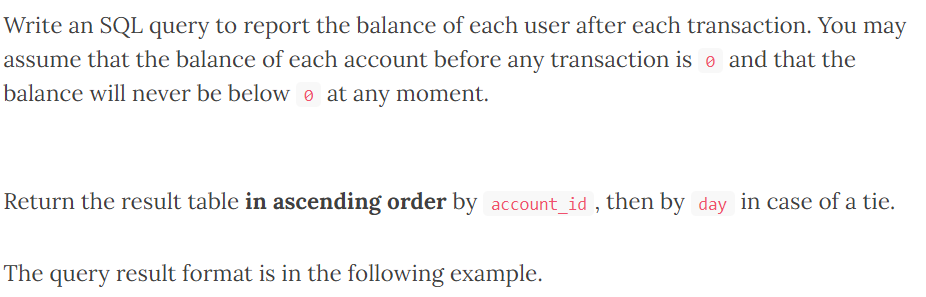

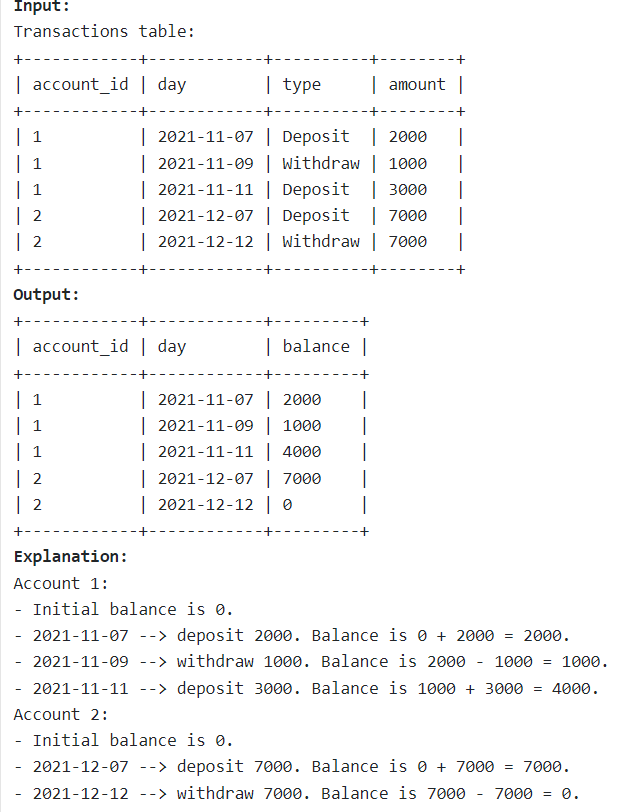

    with cte as(
        Select *, CASE WHEN type = 'Deposit' THEN amount ELSE -amount END as amount_with_sign
        from Transactions
    )
    SELECT account_id, day, 
        SUM(amount_with_sign) 
            OVER (PARTITION BY account_id ORDER BY day Rows Between Unbounded Preceeding And Current Row) AS balance
    FROM Transactions
    Order By account_id, day;